In [ ]:
from google.colab import files


uploaded = files.upload()

Saving train.csv to train (2).csv
Saving test.csv to test (1).csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
import re, string
from symspellpy import SymSpell, Verbosity
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from xgboost import XGBClassifier
import xgboost as xgb
from wordcloud import WordCloud

In [ ]:
train = pd.read_csv('train.csv')
train.head()

,id,keyword,place,tweet,disaster
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test = pd.read_csv('test.csv')
test.head()

,id,keyword,place,tweet
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Text Cleaning and Preprocessing

In [ ]:
train['keyword'] = train['keyword'].apply(lambda x: str.lower(x) if pd.isna(x) != True else x)
train['place'] = train['place'].apply(lambda x: str.lower(x) if pd.isna(x) != True else x)
train['tweet'] = train['tweet'].apply(lambda x: str.lower(x) if pd.isna(x) != True else x)
test['keyword'] = test['keyword'].apply(lambda x: str.lower(x) if pd.isna(x) != True else x)
test['place'] = test['place'].apply(lambda x: str.lower(x) if pd.isna(x) != True else x)
test['tweet'] = test['tweet'].apply(lambda x: str.lower(x) if pd.isna(x) != True else x)

In [ ]:
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english') and not word.isdigit()])

In [ ]:
train['keyword'] = train['keyword'].apply(lambda x: text_process(x) if pd.isna(x) != True else x)
train['place'] = train['place'].apply(lambda x: text_process(x) if pd.isna(x) != True else x)
train['tweet'] = train['tweet'].apply(lambda x: text_process(x) if pd.isna(x) != True else x)
test['keyword'] = test['keyword'].apply(lambda x: text_process(x) if pd.isna(x) != True else x)
test['place'] = test['place'].apply(lambda x: text_process(x) if pd.isna(x) != True else x)
test['tweet'] = test['tweet'].apply(lambda x: text_process(x) if pd.isna(x) != True else x)

In [ ]:
train['keyword'] = train['keyword'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x) if pd.isna(x) != True else x)
train['place'] = train['place'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x) if pd.isna(x) != True else x)
train['tweet'] = train['tweet'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x) if pd.isna(x) != True else x)
test['keyword'] = test['keyword'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x) if pd.isna(x) != True else x)
test['place'] = test['place'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x) if pd.isna(x) != True else x)
test['tweet'] = test['tweet'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x) if pd.isna(x) != True else x)

In [ ]:
sym_spell = SymSpell()
def spelling_correction(text):
    correct_spellings = []
    for token in text.split():
        x = sym_spell.lookup(token,Verbosity.CLOSEST,max_edit_distance=2,include_unknown=True)[0].__str__()
        y = x.split(',')[0]
        correct_spellings.append(y)
    return ' '.join(correct_spellings)

In [ ]:
train['keyword'] = train['keyword'].apply(lambda x: spelling_correction(x) if pd.isna(x) != True else x)
train['place'] = train['place'].apply(lambda x: spelling_correction(x) if pd.isna(x) != True else x)
train['tweet'] = train['tweet'].apply(lambda x: spelling_correction(x) if pd.isna(x) != True else x)
test['keyword'] = test['keyword'].apply(lambda x: spelling_correction(x) if pd.isna(x) != True else x)
test['place'] = test['place'].apply(lambda x: spelling_correction(x) if pd.isna(x) != True else x)
test['tweet'] = test['tweet'].apply(lambda x: spelling_correction(x) if pd.isna(x) != True else x)

In [ ]:
stemmer = PorterStemmer()

def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

train['keyword'] = train['keyword'].apply(lambda x: stem_words(x) if pd.isna(x) != True else x)
train['place'] = train['place'].apply(lambda x: stem_words(x) if pd.isna(x) != True else x)
train['tweet'] = train['tweet'].apply(lambda x: stem_words(x) if pd.isna(x) != True else x)
test['keyword'] = test['keyword'].apply(lambda x: stem_words(x) if pd.isna(x) != True else x)
test['place'] = test['place'].apply(lambda x: stem_words(x) if pd.isna(x) != True else x)
test['tweet'] = test['tweet'].apply(lambda x: stem_words(x) if pd.isna(x) != True else x)

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

train['keyword'] = train['keyword'].apply(lambda x: lemmatize_words(x) if pd.isna(x) != True else x)
train['place'] = train['place'].apply(lambda x: lemmatize_words(x) if pd.isna(x) != True else x)
train['tweet'] = train['tweet'].apply(lambda x: lemmatize_words(x) if pd.isna(x) != True else x)
test['keyword'] = test['keyword'].apply(lambda x: lemmatize_words(x) if pd.isna(x) != True else x)
test['place'] = test['place'].apply(lambda x: lemmatize_words(x) if pd.isna(x) != True else x)
test['tweet'] = test['tweet'].apply(lambda x: lemmatize_words(x) if pd.isna(x) != True else x)

In [ ]:
for col in train.columns:
    print("% of null values in {} =".format(col),str(np.round(train[col].isnull().sum()/len(train[col]),2)) + '%')

% of null values in id = 0.0%
% of null values in keyword = 0.01%
% of null values in place = 0.33%
% of null values in tweet = 0.0%
% of null values in disaster = 0.0%


In [ ]:
train['place'].fillna('Unavailable',inplace=True)
test['place'].fillna('Unavailable',inplace=True)

In [ ]:
train['keyword']=train['keyword'].fillna('None')
test['keyword']=test['keyword'].fillna('None')

**Exploratory Data Analysis**

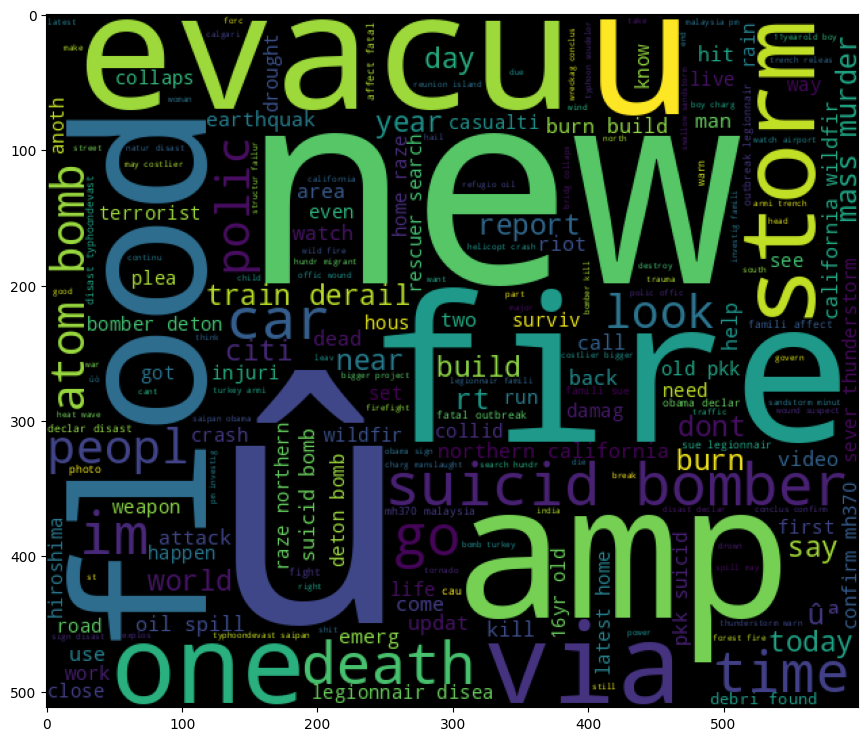

In [ ]:
disaster_tweets = ' '.join(list(train[train['disaster'] == 1]['tweet'])) # Assuming 'tweet' is the column indicating disaster tweets
data_wc = WordCloud(width = 600, height = 512).generate(disaster_tweets)
plt.figure(figsize = (13, 9))
plt.imshow(data_wc)
plt.show()

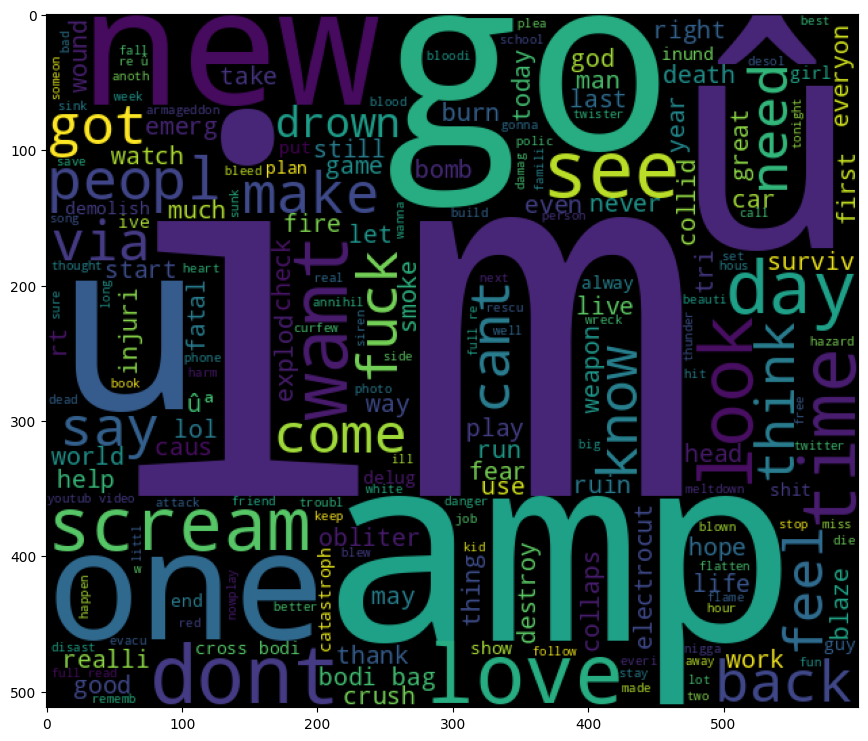

In [ ]:
non_disaster_tweets = ' '.join(list(train[train['disaster'] == 0]['tweet']))
data_wc = WordCloud(width = 600, height = 512).generate(non_disaster_tweets)
plt.figure(figsize = (13, 9))
plt.imshow(data_wc)
plt.show()

<Axes: xlabel='count', ylabel='tweet'>

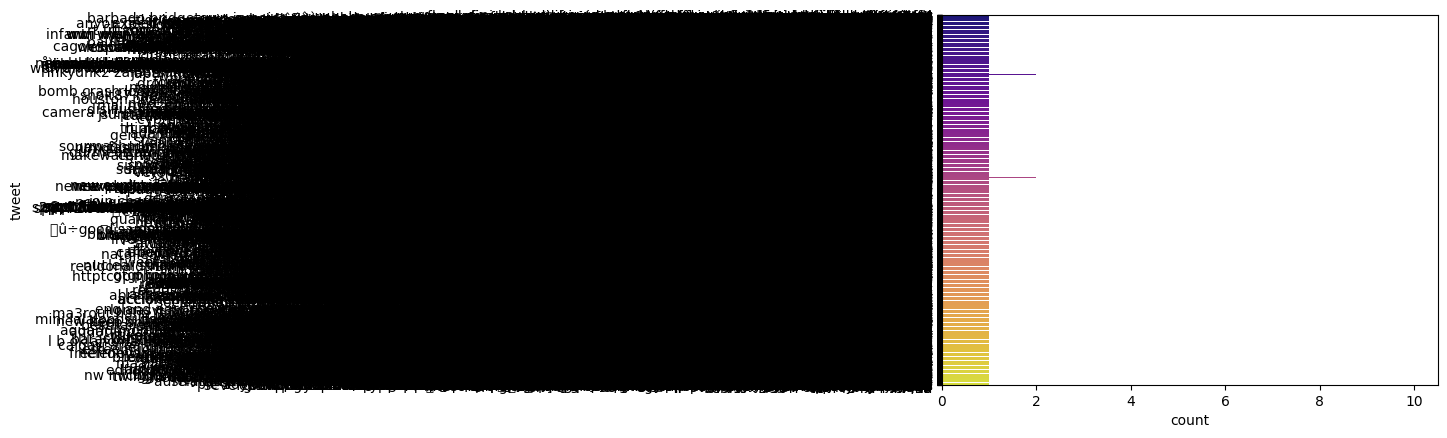

In [ ]:
sns.countplot(train['tweet'],palette='plasma')


Text Vectorization and Normalization

In [ ]:
vectorizer = CountVectorizer()

bow_tweet = vectorizer.fit_transform(train.tweet)
bow_tweet_test = vectorizer.transform(test.tweet)
bow_tweet

<7613x18866 sparse matrix of type '<class 'numpy.int64'>'
	with 72139 stored elements in Compressed Sparse Row format>


Model Training and Evaluation

In [ ]:
tweet_train, tweet_test, disaster_train, disaster_train_test = train_test_split(bow_tweet,train['disaster'],test_size=0.35)

In [ ]:
mnb = MultinomialNB()
mnb.fit(tweet_train,disaster_train)

MultinomialNB()

In [ ]:
predictions = mnb.predict(tweet_test)
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
print(confusion_matrix(disaster_train_test,predictions))
print(classification_report(disaster_train_test,predictions))

[[1318  220]
 [ 313  814]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1538
           1       0.79      0.72      0.75      1127

    accuracy                           0.80      2665
   macro avg       0.80      0.79      0.79      2665
weighted avg       0.80      0.80      0.80      2665



In [ ]:
param_grid = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}

In [ ]:
grid_search = GridSearchCV(MultinomialNB(),param_grid,refit=True,verbose=3)
grid_search.fit(tweet_train,disaster_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...........................alpha=1;, score=0.770 total time=   0.0s
[CV 2/5] END ...........................alpha=1;, score=0.790 total time=   0.0s
[CV 3/5] END ...........................alpha=1;, score=0.797 total time=   0.0s
[CV 4/5] END ...........................alpha=1;, score=0.800 total time=   0.0s
[CV 5/5] END ...........................alpha=1;, score=0.786 total time=   0.0s
[CV 1/5] END .........................alpha=0.1;, score=0.758 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.773 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.774 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.778 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.767 total time=   0.0s
[CV 1/5] END ........................alpha=0.01;, score=0.744 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;,

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
             verbose=3)

In [ ]:

grid_search.best_score_

0.7884010989572161

In [ ]:
optimized_mnb = grid_search.predict(tweet_test)
optimized_mnb


array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
print(confusion_matrix(disaster_train_test,optimized_mnb))
print(classification_report(disaster_train_test,optimized_mnb))

[[1318  220]
 [ 313  814]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1538
           1       0.79      0.72      0.75      1127

    accuracy                           0.80      2665
   macro avg       0.80      0.79      0.79      2665
weighted avg       0.80      0.80      0.80      2665



In [ ]:

logmodel = LogisticRegression()
logmodel.fit(tweet_train,disaster_train)

LogisticRegression()

In [ ]:
lr_pred = logmodel.predict(tweet_test)
lr_pred

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
print(confusion_matrix(disaster_train_test,lr_pred))
print(classification_report(disaster_train_test,lr_pred))

[[1341  197]
 [ 335  792]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1538
           1       0.80      0.70      0.75      1127

    accuracy                           0.80      2665
   macro avg       0.80      0.79      0.79      2665
weighted avg       0.80      0.80      0.80      2665



In [ ]:
rfc = RandomForestClassifier(n_estimators=2)
rfc.fit(tweet_train,disaster_train)


RandomForestClassifier(n_estimators=2)

In [ ]:
rfc_pred = rfc.predict(tweet_test)
rfc_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(confusion_matrix(disaster_train_test,rfc_pred))
print(classification_report(disaster_train_test,rfc_pred))

[[1404  134]
 [ 594  533]]
              precision    recall  f1-score   support

           0       0.70      0.91      0.79      1538
           1       0.80      0.47      0.59      1127

    accuracy                           0.73      2665
   macro avg       0.75      0.69      0.69      2665
weighted avg       0.74      0.73      0.71      2665



In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(tweet_train,disaster_train)


DecisionTreeClassifier()

In [ ]:
dtree_pred = dtree.predict(tweet_test)
dtree_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
print(confusion_matrix(disaster_train_test,dtree_pred))
print(classification_report(disaster_train_test,dtree_pred))

[[1248  290]
 [ 351  776]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1538
           1       0.73      0.69      0.71      1127

    accuracy                           0.76      2665
   macro avg       0.75      0.75      0.75      2665
weighted avg       0.76      0.76      0.76      2665



In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(tweet_train,disaster_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn_pred = knn.predict(tweet_test)
knn_pred


array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
print(confusion_matrix(disaster_train_test,knn_pred))
print(classification_report(disaster_train_test,knn_pred))

[[1505   33]
 [ 791  336]]
              precision    recall  f1-score   support

           0       0.66      0.98      0.79      1538
           1       0.91      0.30      0.45      1127

    accuracy                           0.69      2665
   macro avg       0.78      0.64      0.62      2665
weighted avg       0.76      0.69      0.64      2665



In [ ]:
param_grid = {'n_neighbors': [1,2,3,4,5],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'weights': ['uniform','distance'],
              'p': [1,2]}

In [ ]:
grid_search = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=3)
grid_search

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [ ]:
grid_search.fit(tweet_train,disaster_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.687 total time=   0.6s
[CV 2/5] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.693 total time=   0.7s
[CV 3/5] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.678 total time=   0.6s
[CV 4/5] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.686 total time=   0.7s
[CV 5/5] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.683 total time=   0.7s
[CV 1/5] END algorithm=auto, n_neighbors=1, p=1, weights=distance;, score=0.687 total time=   0.7s
[CV 2/5] END algorithm=auto, n_neighbors=1, p=1, weights=distance;, score=0.693 total time=   0.5s
[CV 3/5] END algorithm=auto, n_neighbors=1, p=1, weights=distance;, score=0.678 total time=   0.5s
[CV 4/5] END algorithm=auto, n_neighbors=1, p=1, weights=distance;, score=0.686 total time=   0.5s
[CV 5/5] END algorithm=auto, n_neighbors=1, p=1, wei

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [ ]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [ ]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [ ]:
grid_search.best_score_

0.6978580547640204

In [ ]:
optimized_knn = grid_search.predict(tweet_test)
optimized_knn

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
print(confusion_matrix(disaster_train_test,optimized_knn))
print(classification_report(disaster_train_test,optimized_knn))

[[1448   90]
 [ 641  486]]
              precision    recall  f1-score   support

           0       0.69      0.94      0.80      1538
           1       0.84      0.43      0.57      1127

    accuracy                           0.73      2665
   macro avg       0.77      0.69      0.68      2665
weighted avg       0.76      0.73      0.70      2665



In [ ]:
svm = SVC()
svm.fit(tweet_train,disaster_train)


SVC()

In [ ]:
svm_pred = svm.predict(tweet_test)
svm_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
print(confusion_matrix(disaster_train_test,svm_pred))
print(classification_report(disaster_train_test,svm_pred))

[[1402  136]
 [ 391  736]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1538
           1       0.84      0.65      0.74      1127

    accuracy                           0.80      2665
   macro avg       0.81      0.78      0.79      2665
weighted avg       0.81      0.80      0.80      2665




Hyperparameter Tuning using GridSearchCV

In [ ]:
param_grid = {'C': [1,0.1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [ ]:
grid_search = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid_search.fit(tweet_train,disaster_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.596 total time=   5.4s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.603 total time=   3.6s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.600 total time=   3.4s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.602 total time=   3.2s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.608 total time=   3.1s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.779 total time=   2.4s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.811 total time=   2.4s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.789 total time=   2.4s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.796 total time=   2.7s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.788 total time=   3.1s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.747 total time=   2.1s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 0.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
optimized_svm = grid_search.predict(tweet_test)
optimized_svm

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
print(confusion_matrix(disaster_train_test,optimized_svm))
print(classification_report(disaster_train_test,optimized_svm))

[[1402  136]
 [ 393  734]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1538
           1       0.84      0.65      0.74      1127

    accuracy                           0.80      2665
   macro avg       0.81      0.78      0.79      2665
weighted avg       0.81      0.80      0.80      2665



In [ ]:
xgb = XGBClassifier(use_label_encoder=False,
                    objective='binary:logistic',
                    n_estimators=1000,
                    tree_method='hist',
                    booster='gbtree'
                   )

In [ ]:
eval_set = [(tweet_train, disaster_train), (tweet_test, disaster_train_test)]

In [ ]:
xgb.fit(tweet_train,
        disaster_train,
        early_stopping_rounds=5,
        eval_set=eval_set
       )

[0]	validation_0-logloss:0.66219	validation_1-logloss:0.65733
[1]	validation_0-logloss:0.64700	validation_1-logloss:0.64551
[2]	validation_0-logloss:0.63394	validation_1-logloss:0.63216
[3]	validation_0-logloss:0.62393	validation_1-logloss:0.62198
[4]	validation_0-logloss:0.61491	validation_1-logloss:0.61454
[5]	validation_0-logloss:0.60521	validation_1-logloss:0.60754
[6]	validation_0-logloss:0.59709	validation_1-logloss:0.60125
[7]	validation_0-logloss:0.58983	validation_1-logloss:0.59383
[8]	validation_0-logloss:0.58372	validation_1-logloss:0.58818
[9]	validation_0-logloss:0.57831	validation_1-logloss:0.58316
[10]	validation_0-logloss:0.57319	validation_1-logloss:0.57756
[11]	validation_0-logloss:0.56761	validation_1-logloss:0.57336
[12]	validation_0-logloss:0.56176	validation_1-logloss:0.56736
[13]	validation_0-logloss:0.55673	validation_1-logloss:0.56422
[14]	validation_0-logloss:0.55212	validation_1-logloss:0.56197
[15]	validation_0-logloss:0.54822	validation_1-logloss:0.55916
[1

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_predictions = xgb.predict(tweet_test)
xgb_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(confusion_matrix(disaster_train_test,xgb_predictions))
print(classification_report(disaster_train_test,xgb_predictions))

[[1358  180]
 [ 380  747]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1538
           1       0.81      0.66      0.73      1127

    accuracy                           0.79      2665
   macro avg       0.79      0.77      0.78      2665
weighted avg       0.79      0.79      0.79      2665



**CONCLUSION**

In [ ]:
print('Performance of ML Models:')
print('Prediction Accuracy of Logistic Regression:',str(np.round(accuracy_score(target_test,lr_pred)*100,2)) + '%')
print('Prediction Accuracy of K Nearest Neighbors:',str(np.round(accuracy_score(target_test,knn_pred)*100,2)) + '%')
print('Prediction Accuracy of Support Vector Machines Classifier:',str(np.round(accuracy_score(target_test,svm_pred)*100,2)) + '%')
print('Prediction Accuracy of Decision Tree Classifier:',str(np.round(accuracy_score(target_test,dtree_pred)*100,2)) + '%')
print('Prediction Accuracy of Random Forests Classifier:',str(np.round(accuracy_score(target_test,lr_pred)*100,2)) + '%')
print('Prediction Accuracy of Multinomial Naive Bayes:',str(np.round(accuracy_score(target_test,predictions)*100,2)) + '%')
print('Prediction Accuracy of Optimized K Nearest Neighbors:',str(np.round(accuracy_score(target_test,optimized_knn)*100,2)) + '%')
print('Prediction Accuracy of XGBoost Classifier:',str(np.round(accuracy_score(target_test,xgb_predictions)*100,2)) + '%')

Performance of ML Models:
Prediction Accuracy of Logistic Regression: 52.76%
Prediction Accuracy of K Nearest Neighbors: 56.06%
Prediction Accuracy of Support Vector Machines Classifier: 53.25%
Prediction Accuracy of Decision Tree Classifier: 50.77%
Prediction Accuracy of Random Forests Classifier: 52.76%
Prediction Accuracy of Multinomial Naive Bayes: 52.65%
Prediction Accuracy of Optimized K Nearest Neighbors: 54.97%
Prediction Accuracy of XGBoost Classifier: 52.38%



Making predictions on test data

In [ ]:

bow_tweet.shape, bow_tweet_test.shape

((7613, 18866), (3263, 18866))

In [ ]:
predictions = mnb.predict(bow_tweet_test)
predictions

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
assert(len(predictions) == test.shape[0])

In [ ]:
predictions = pd.DataFrame(predictions)
idx = test.id
final_df = pd.concat([idx,predictions],axis=1)
final_df.columns = ['id','target']
final_df.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [ ]:
final_df.to_csv('tweet_disaster_prediction.csv',index=False)